In [80]:
# %%
# Jupyter Notebook cell 1 — Imports
import numpy as np
import pandas as pd

# %%
# Jupyter Notebook cell 2 — Load the CSV file
# Update the path if needed
file_path = "S_parameter_vs_temp.csv"

# Read the CSV file using pandas
data = pd.read_csv(file_path)

# Display the first few rows to verify
display(data.head())

# %%
# Jupyter Notebook cell 3 — Extract columns into NumPy arrays
T_AS       = data["Temperature [K]"].to_numpy()
I_AS       = data["Intensity [W/cm²]"].to_numpy()
S_AS       = data["S"].to_numpy()
FWHM_AS    = data["FWHM [Hz]"].to_numpy()
Gam_tot_AS = data["FWHM deph + FWHM0 [Hz]"].to_numpy()
Fluo_AS    = data["Fluorescence [cps]"].to_numpy()

# %%
# Jupyter Notebook cell 4 — Check the extracted arrays
print("T:", T_AS.shape, "→", T_AS[:5])
print("I:", I_AS.shape, "→", I_AS[:5])
print("S:", S_AS.shape, "→", S[:5])
print("FWHM:", FWHM_AS.shape, "→", FWHM_AS[:5])
print("Gam_tot:", Gam_tot_AS.shape, "→", Gam_tot_AS[:5])
print("Fluo:", Fluo_AS.shape, "→", Fluo_AS[:5])



,Temperature [K],Intensity [W/cm²],S,FWHM [Hz],FWHM deph + FWHM0 [Hz],Fluorescence [cps]
0,4.731820,0.428243,0.108321,2.535635e+08,2.408540e+08,15550.338565
1,4.777749,0.428243,0.123954,2.635728e+08,2.486144e+08,17547.096787
2,4.490514,0.428243,0.100211,2.133204e+08,2.033736e+08,14492.044091
3,5.075639,0.856485,0.225183,3.367827e+08,3.042631e+08,29243.322029
4,4.551905,1.712970,0.394787,2.508496e+08,2.124025e+08,45034.647029


T: (49,) → [4.73181998 4.77774867 4.49051393 5.07563945 4.55190483]
I: (49,) → [0.42824258 0.42824258 0.42824258 0.85648516 1.71297031]
S: (49,) → [0.10832125 0.12395445 0.10021059 0.22518313 0.39478694]
FWHM: (49,) → [2.53563457e+08 2.63572818e+08 2.13320427e+08 3.36782713e+08
 2.50849642e+08]
Gam_tot: (49,) → [2.40853984e+08 2.48614391e+08 2.03373581e+08 3.04263100e+08
 2.12402464e+08]
Fluo: (49,) → [15550.33856457 17547.09678679 14492.04409057 29243.32202877
 45034.64702943]


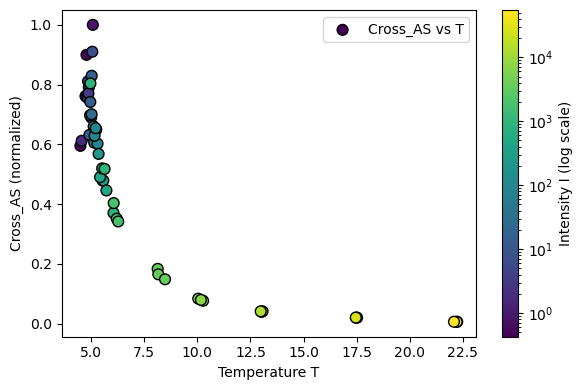

In [81]:
# %%
# (Optional) Example plot with color-coded markers by intensity I (log-scale colormap)
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Compute Cross_AS
Cross_AS = S_AS / I_AS * Gam_tot_AS / 40e6
Cross_AS = Cross_AS / np.amax(Cross_AS)

# Avoid zero or negative values for log normalization
I_pos = np.clip(I_AS, np.min(I_AS[I_AS > 0]), None)

plt.figure(figsize=(6, 4))

# Scatter plot with log-scale color normalization
sc = plt.scatter(
    T_AS, Cross_AS,
    c=I_pos,
    cmap='viridis',
    norm=LogNorm(vmin=np.min(I_pos), vmax=np.max(I_pos)),
    s=60,
    edgecolor='k',
    label="Cross_AS vs T"
)

# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label("Intensity I (log scale)")

plt.xlabel("Temperature T")
plt.ylabel("Cross_AS (normalized)")
#plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()

In [82]:
Rinfty = np.amax(Fluo_AS)*1.005
print(Rinfty)

159107.942923358


In [83]:
# %%
# Jupyter Notebook cell 2 — Load the CSV file
# Update the path if needed
file_path = "S_parameter_vs_temp_temp_scan.csv"

# Read the CSV file using pandas
data = pd.read_csv(file_path)

# Display the first few rows to verify
display(data.head())

# %%
# Jupyter Notebook cell 3 — Extract columns into NumPy arrays
T_temp       = data["Temperature [K]"].to_numpy()
I_temp       = data["Intensity [W/cm²]"].to_numpy()
S_temp       = data["S"].to_numpy()
FWHM_temp    = data["FWHM [Hz]"].to_numpy()
Gam_tot_temp = data["FWHM deph + FWHM0 [Hz]"].to_numpy()
Fluo_temp    = data["Fluorescence [cps]"].to_numpy()

# %%
# Jupyter Notebook cell 4 — Check the extracted arrays
print("T:", T_temp.shape, "→", T_temp[:5])
print("I:", I_temp.shape, "→", I_temp[:5])
print("S:", S_temp.shape, "→", S_temp[:5])
print("FWHM:", FWHM_temp.shape, "→", FWHM_temp[:5])
print("Gam_tot:", Gam_tot_temp.shape, "→", Gam_tot_temp[:5])
print("Fluo:", Fluo_temp.shape, "→", Fluo_temp[:5])

,Temperature [K],Intensity [W/cm²],S,FWHM [Hz],FWHM deph + FWHM0 [Hz],Fluorescence [cps]
0,4.165629,2.288549,2.002149,1.547998e+08,8.934172e+07,77863.836446
1,4.089000,2.288549,2.034346,1.582756e+08,9.086182e+07,79093.525118
2,3.980500,2.288549,2.153754,1.509551e+08,8.500291e+07,83333.011420
3,4.213500,2.288549,1.995608,1.647924e+08,9.521266e+07,77609.181995
4,4.130500,2.288549,2.006077,1.632949e+08,9.418303e+07,78015.954792


T: (175,) → [4.16562857 4.089      3.9805     4.2135     4.1305    ]
I: (175,) → [2.28854873 2.28854873 2.28854873 2.28854873 2.28854873]
S: (175,) → [2.00214896 2.03434604 2.15375429 1.99560828 2.00607655]
FWHM: (175,) → [1.54799806e+08 1.58275600e+08 1.50955081e+08 1.64792415e+08
 1.63294920e+08]
Gam_tot: (175,) → [89341716.5720993  90861816.68499056 85002913.03275909 95212661.9386006
 94183029.81320918]
Fluo: (175,) → [77863.8364458  79093.52511789 83333.01141986 77609.18199536
 78015.95479158]


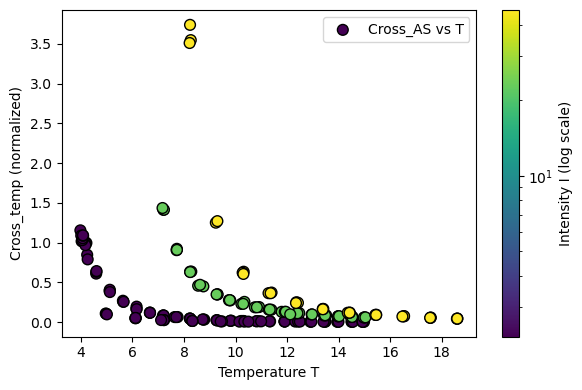

In [84]:
# S in the data set has an offset artificial and it's S+1!!!
# (Optional) Example plot with color-coded markers by intensity I (log-scale colormap)
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Compute Cross_AS
Cross_temp = S_temp -1  #ERROR in the dataset there is not S but S+1!!!
Cross_temp = Cross_temp #/ np.amax(Cross_temp)

# Avoid zero or negative values for log normalization
I_postemp = np.clip(I_temp, np.min(I_temp[I_temp > 0]), None)

plt.figure(figsize=(6, 4))

# Scatter plot with log-scale color normalization
sctemp = plt.scatter(
    T_temp, Cross_temp,
    c=I_postemp,
    cmap='viridis',
    norm=LogNorm(vmin=np.min(I_postemp), vmax=np.max(I_postemp)),
    s=60,
    edgecolor='k',
    label="Cross_AS vs T"
)

# Add colorbar
cbar = plt.colorbar(sctemp)
cbar.set_label("Intensity I (log scale)")

plt.xlabel("Temperature T")
plt.ylabel("Cross_temp (normalized)")
#plt.yscale('log')
#plt.ylim(0,0.3)
plt.legend()
plt.tight_layout()
plt.show()

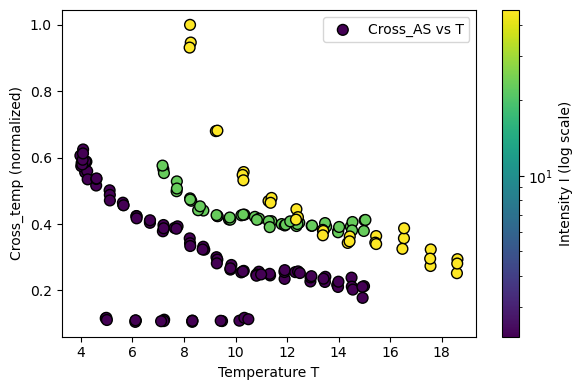

In [85]:
Snew_temp = Fluo_temp/Rinfty/(1-Fluo_temp/Rinfty)


# Compute Cross_AS
Cross_temp_new = Snew_temp * Gam_tot_temp/I_temp #*(1+Snew_temp)**.5
Cross_temp_new = Cross_temp_new / np.amax(Cross_temp_new)

# Avoid zero or negative values for log normalization
I_postemp = np.clip(I_temp, np.min(I_temp[I_temp > 0]), None)

plt.figure(figsize=(6, 4))

# Scatter plot with log-scale color normalization
sctemp = plt.scatter(
    T_temp, Cross_temp_new,
    c=I_postemp,
    cmap='viridis',
    norm=LogNorm(vmin=np.min(I_postemp), vmax=np.max(I_postemp)),
    s=60,
    edgecolor='k',
    label="Cross_AS vs T"
)

# Add colorbar
cbar = plt.colorbar(sctemp)
cbar.set_label("Intensity I (log scale)")

plt.xlabel("Temperature T")
plt.ylabel("Cross_temp (normalized)")
#plt.yscale('log')
#plt.ylim(0,0.3)
plt.legend()
plt.tight_layout()
plt.show()

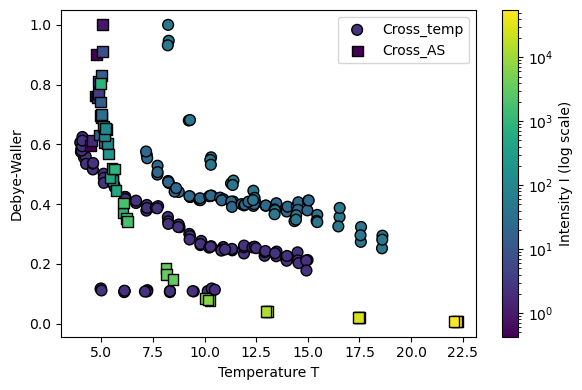

In [133]:
# %%
# Combined plot of Cross_temp_new and Cross_AS (single panel, shared log-scale colormap)
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

# --- First dataset (temp)
Snew_temp = Fluo_temp / Rinfty / (1 - Fluo_temp / Rinfty)
Cross_temp_new = Snew_temp * Gam_tot_temp / I_temp
Cross_temp_new = Cross_temp_new / np.amax(Cross_temp_new)
I_postemp = np.clip(I_temp, np.min(I_temp[I_temp > 0]), None)

# --- Second dataset (AS)
Cross_AS = (S_AS / I_AS * Gam_tot_AS )
Cross_AS = Cross_AS / np.amax(Cross_AS)
I_pos = np.clip(I_AS, np.min(I_AS[I_AS > 0]), None)

# --- Determine common color scale for both datasets
vmin = min(np.min(I_postemp), np.min(I_pos))
vmax = max(np.max(I_postemp), np.max(I_pos))
norm = LogNorm(vmin=vmin, vmax=vmax)

# --- Create combined figure
plt.figure(figsize=(6, 4))

# Plot both datasets with same colormap and normalization
sc1 = plt.scatter(
    T_temp, Cross_temp_new,
    c=I_postemp,
    cmap='viridis',
    norm=norm,
    s=60,
    edgecolor='k',
    marker='o',
    label="Cross_temp"
)

sc2 = plt.scatter(
    T_AS, Cross_AS,
    c=I_pos,
    cmap='viridis',
    norm=norm,
    s=60,
    edgecolor='k',
    marker='s',
    label="Cross_AS"
)

# --- Colorbar and labels
cbar = plt.colorbar(sc1)
cbar.set_label("Intensity I (log scale)")

plt.xlabel("Temperature T")
plt.ylabel("Debye-Waller")
#plt.yscale('log') 
#plt.xscale('log') 
plt.legend()
plt.tight_layout()
plt.show()

In [132]:
print(np.amin(T_AS))

4.4905139342352625


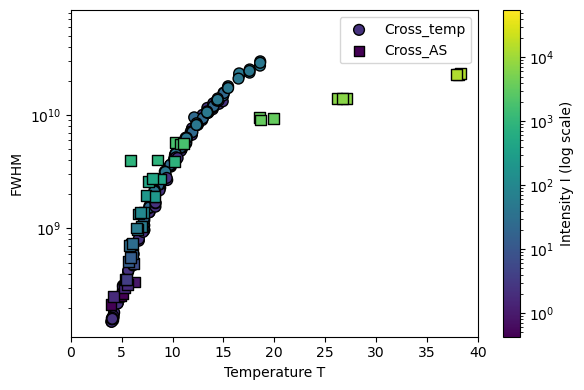

In [130]:

# --- First dataset (temp)
Snew_temp = Fluo_temp / Rinfty / (1 - Fluo_temp / Rinfty)
Cross_temp_new = Snew_temp * Gam_tot_temp / I_temp
Cross_temp_new = Cross_temp_new / np.amax(Cross_temp_new)
I_postemp = np.clip(I_temp, np.min(I_temp[I_temp > 0]), None)

# --- Second dataset (AS)
Cross_AS = (S_AS / I_AS * Gam_tot_AS )
Cross_AS = Cross_AS / np.amax(Cross_AS)
I_pos = np.clip(I_AS, np.min(I_AS[I_AS > 0]), None)

# --- Determine common color scale for both datasets
vmin = min(np.min(I_postemp), np.min(I_pos))
vmax = max(np.max(I_postemp), np.max(I_pos))
norm = LogNorm(vmin=vmin, vmax=vmax)

# --- Create combined figure
plt.figure(figsize=(6, 4))

# Plot both datasets with same colormap and normalization
sc1 = plt.scatter(
    T_temp, FWHM_temp,
    c=I_postemp,
    cmap='viridis',
    norm=norm,
    s=60,
    edgecolor='k',
    marker='o',
    label="Cross_temp"
)

sc2 = plt.scatter(
    4*T_AS-14, FWHM_AS,
    c=I_pos,
    cmap='viridis',
    norm=norm,
    s=60,
    edgecolor='k',
    marker='s',
    label="Cross_AS"
)

# --- Colorbar and labels
cbar = plt.colorbar(sc1)
cbar.set_label("Intensity I (log scale)")

plt.xlabel("Temperature T")
plt.ylabel("FWHM")
plt.yscale('log') 
#plt.xscale('log') 
plt.xlim(0,40)
#plt.ylim(0,1e10)
plt.legend()
plt.tight_layout()
plt.show()